### Online Retail Analysis
The dataset transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#checking for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#dropping the null values
df=df.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
#converting customer id from float to object
df['CustomerID']=df['CustomerID'].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
#number of unique customers
df['CustomerID'].nunique()

4372

In [10]:
#determining the most recent trasnsaction
most_rec_tr=df['InvoiceDate'].max()
most_rec_tr

Timestamp('2011-12-09 12:50:00')

In [11]:
#determining the recency
df['Recency']=df['InvoiceDate'].apply(lambda x: (most_rec_tr-x).days)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373


In [12]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

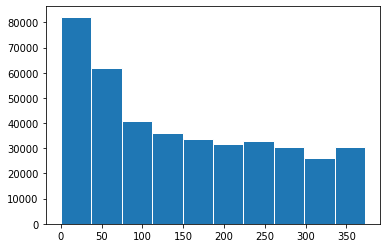

In [13]:
#distribution of recency
plt.hist(df['Recency'],ec='white')
plt.show()

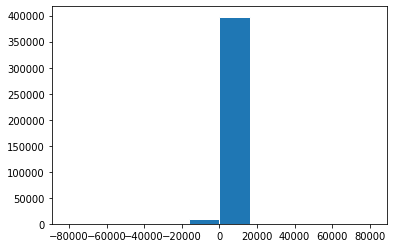

In [14]:
#distribution of recency
plt.hist(df['Quantity'],ec='white')
plt.show()

In [15]:
#Number of negative quantities
df[df['Quantity']<0].Quantity.count()

8905

In [16]:
#Removing the rows with negative quantities
df=df.drop(df[df['Quantity']<0].index)
df.shape

(397924, 9)

In [17]:
#Total Price = Unit Price * Qty
df['Total Price']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34


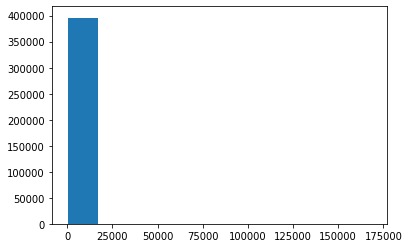

In [18]:
#distribution of total price
plt.hist(df['Total Price'],ec='white')
plt.show()

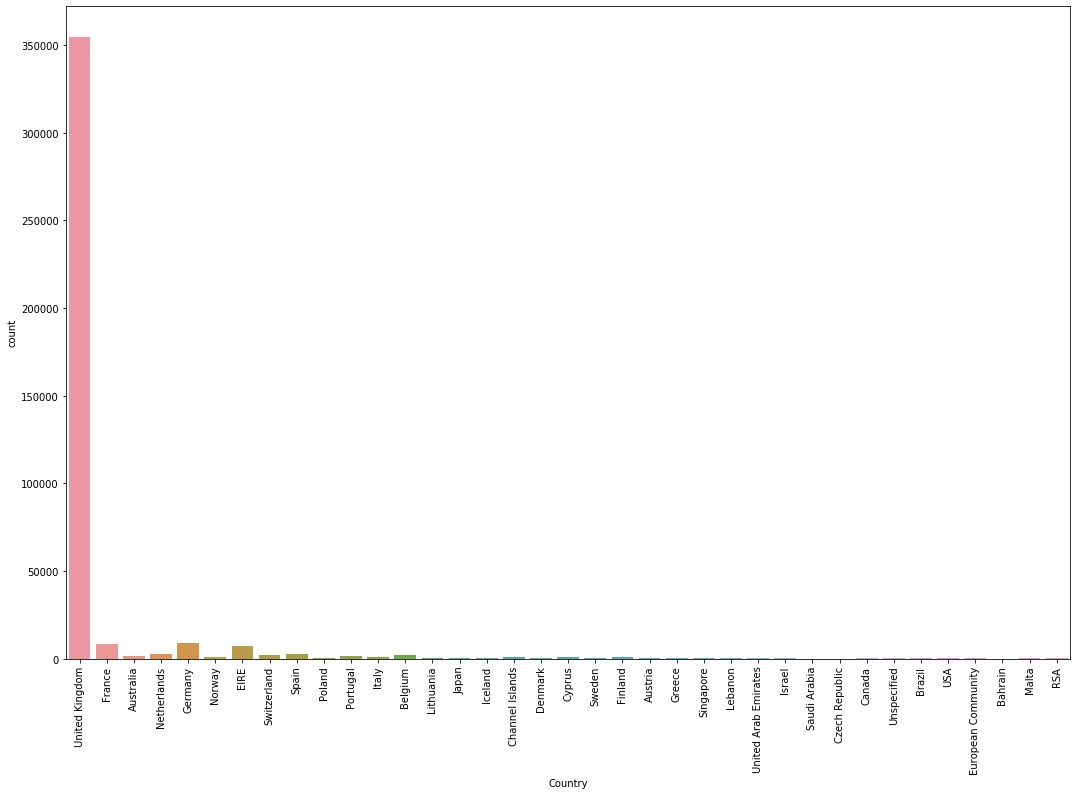

In [19]:
#countrywise online orders
plt.figure(figsize=(18,12))
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

In [20]:
df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [21]:
fr=df['CustomerID'].value_counts()

In [22]:
rec=df['Recency'].groupby(df['CustomerID']).min()

In [23]:
mon=df['Total Price'].groupby(df['CustomerID']).sum()

In [24]:
#creating a new dataframe for rfm analysis
rfm_df=pd.DataFrame({'Recency':rec,'Frequency':fr,'Monetary':mon})
rfm_df.head()

,Recency,Frequency,Monetary
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [25]:
rfm_df.index = rfm_df.index.map(int)
rfm_df.head()

,Recency,Frequency,Monetary
12346,325,1,77183.60
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40


In [26]:
#defining function to calculate R-Score
def R_Score(rec):
    if ((rec>=rfm_df['Recency'].min())&(rec<rfm_df['Recency'].quantile(0.25))):
        return 4
    elif ((rec>=rfm_df['Recency'].quantile(0.25))&(rec<rfm_df['Recency'].median())):
          return 3
    elif ((rec>=rfm_df['Recency'].median())&(rec<rfm_df['Recency'].quantile(0.75))):
           return 2
    else:
           return 1

In [27]:
#defining function to calculate F-Score
def F_Score(rec):
    if ((rec>=rfm_df['Frequency'].min())&(rec<rfm_df['Frequency'].quantile(0.25))):
        return 1
    elif ((rec>=rfm_df['Frequency'].quantile(0.25))&(rec<rfm_df['Frequency'].median())):
          return 2
    elif ((rec>=rfm_df['Frequency'].median())&(rec<rfm_df['Frequency'].quantile(0.75))):
           return 3
    else:
           return 4

In [28]:
#defining function to calculate M-Score
def M_Score(rec):
    if ((rec>=rfm_df['Monetary'].min())&(rec<rfm_df['Monetary'].quantile(0.25))):
        return 1
    elif ((rec>=rfm_df['Monetary'].quantile(0.25))&(rec<rfm_df['Monetary'].median())):
          return 2
    elif ((rec>=rfm_df['Monetary'].median())&(rec<rfm_df['Monetary'].quantile(0.75))):
           return 3
    else:
           return 4

In [29]:
#Calculating the scores
rfm_df['R_Score']=rfm_df['Recency'].apply(R_Score)
rfm_df['F_Score']=rfm_df['Frequency'].apply(F_Score)
rfm_df['M_Score']=rfm_df['Monetary'].apply(M_Score)
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
12346,325,1,77183.60,1,1,4
12347,1,182,4310.00,4,4,4
12348,74,31,1797.24,2,2,4
12349,18,73,1757.55,3,3,4
12350,309,17,334.40,1,2,2


In [30]:
#Determining the combined RFM String and RFM Score
rfm_df['RFM']=(100*rfm_df['R_Score'])+(10*rfm_df['F_Score'])+rfm_df['M_Score']
rfm_df['RFM']=rfm_df['RFM'].astype(object)
rfm_df['RFM_Score']=rfm_df['R_Score']+rfm_df['F_Score']+rfm_df['M_Score']
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM,RFM_Score
12346,325,1,77183.60,1,1,4,114,6
12347,1,182,4310.00,4,4,4,444,12
12348,74,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,309,17,334.40,1,2,2,122,5


In [31]:
#applying kmeans clustering
from sklearn.cluster import KMeans
kmns=KMeans(n_clusters=4)

In [32]:
#Features for clustering
feat=rfm_df[['R_Score','F_Score','M_Score']]

In [33]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feat=ss.fit_transform(feat)

In [34]:
kmns.fit(feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
print(kmns.cluster_centers_)

[[-0.70872462  0.45838596  0.57227758]
 [-0.99431841 -0.92342849 -0.91713047]
 [ 0.96601253  0.9952139   0.96457239]
 [ 0.78106057 -0.5717612  -0.64488949]]


In [36]:
print(kmns.labels_)

[0 2 0 ... 3 2 2]


In [37]:
lb=kmns.labels_
unique,counts=np.unique(lb,return_counts=True)

In [38]:
dict(zip(unique,counts))

{0: 800, 1: 1380, 2: 1367, 3: 792}

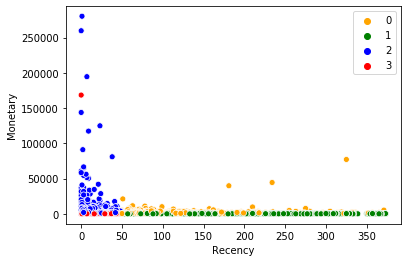

In [39]:
sns.scatterplot(x='Recency',y='Monetary',hue=lb,data=rfm_df,palette=['orange','green','blue','red'])
plt.show()

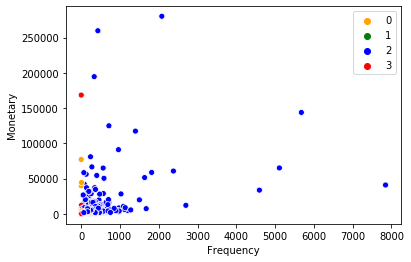

In [40]:
sns.scatterplot(x='Frequency',y='Monetary',hue=lb,data=rfm_df,palette=['orange','green','blue','red'])
plt.show()

In [41]:
rfm_df['Label']=lb
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM,RFM_Score,Label
12346,325,1,77183.60,1,1,4,114,6,0
12347,1,182,4310.00,4,4,4,444,12,2
12348,74,31,1797.24,2,2,4,224,8,0
12349,18,73,1757.55,3,3,4,334,10,2
12350,309,17,334.40,1,2,2,122,5,1


In [42]:
rfm_df=rfm_df.sort_values('RFM_Score',ascending=False)
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM,RFM_Score,Label
15544,8,259,3546.71,4,4,4,444,12,2
14415,0,590,5900.28,4,4,4,444,12,2
16549,9,981,4154.64,4,4,4,444,12,2
14367,7,524,9261.52,4,4,4,444,12,2
16525,1,183,13027.45,4,4,4,444,12,2


In [43]:
#counting the RFM segment wise values
rfm_df['RFM'].value_counts()

444    439
111    374
344    225
122    215
211    176
      ... 
314      8
124      6
414      5
142      4
441      3
Name: RFM, Length: 61, dtype: int64

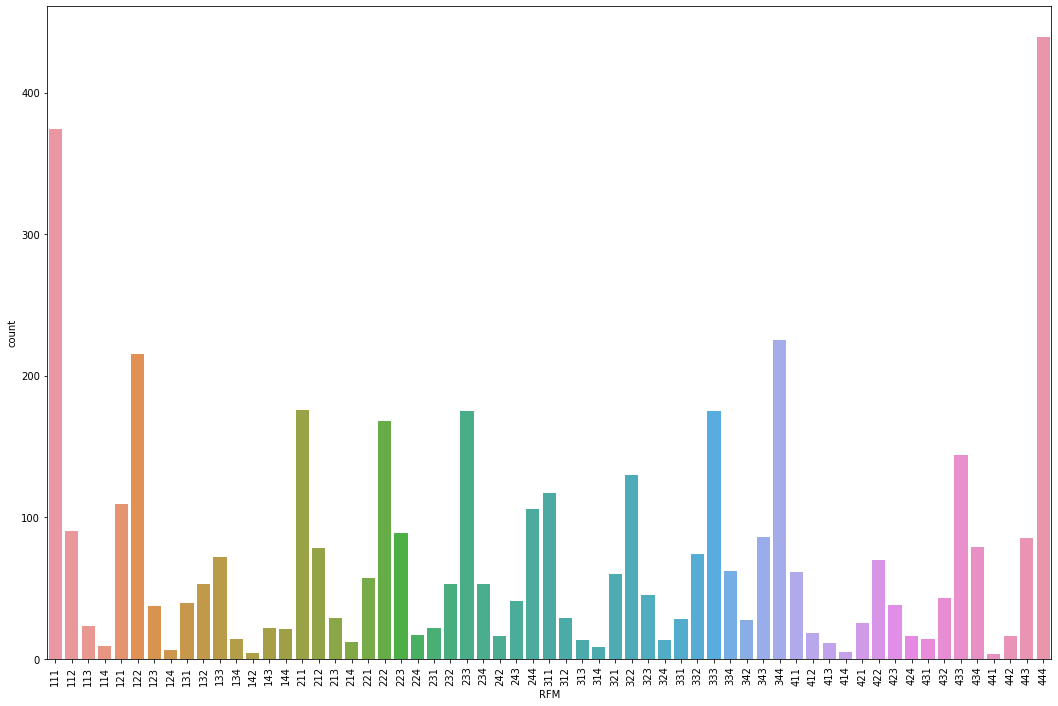

In [44]:
plt.figure(figsize=(18,12))
sns.countplot(rfm_df['RFM'])
plt.xticks(rotation=90)
plt.show()